In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

## Riemann Sums (Foundational Idea)
Partition $[a,b]$ into $n$ equal pieces of width $h = (b-a)/n$.
- Left sum: $Q_L = h \sum_{k=0}^{n-1} f(x_k)$
- Right sum: $Q_R = h \sum_{k=1}^{n} f(x_k)$
- Midpoint sum: $Q_M = h \sum_{k=0}^{n-1} f\big(x_k + h/2\big)$

Accuracy (assuming $f$ is smooth):
- Left / Right: first-order $\mathcal O(h)$
- Midpoint: second-order $\mathcal O(h^2)$


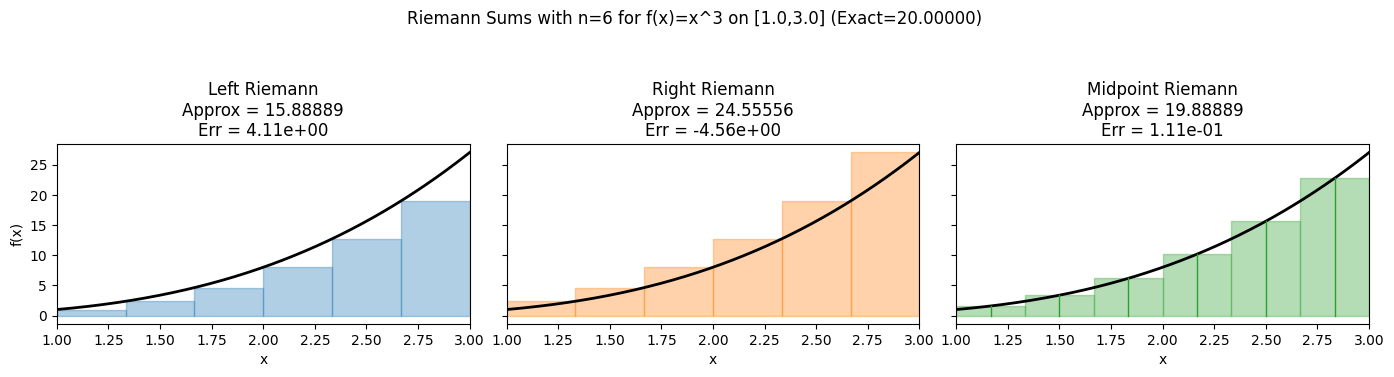

Exact integral = 20.0000000000
Left sum    = 15.8888888889, error = 4.111e+00
Right sum   = 24.5555555556, error = -4.556e+00
Midpoint sum= 19.8888888889, error = 1.111e-01


In [21]:
# Riemann Sums Illustration: Left, Right, Midpoint
import numpy as np
import matplotlib.pyplot as plt

# Define function (reuse if already defined)
try:
    f
except NameError:
    def f(x):
        return x**3
    a, b = 1.0, 3.0
    exact = (b**4 - a**4)/4

if 'a' not in globals():
    a, b = 1.0, 3.0
    exact = (b**4 - a**4)/4

n = 6  # number of subintervals
x_edges = np.linspace(a, b, n+1)
h = (b - a) / n

# Sample points
x_left = x_edges[:-1]
x_right = x_edges[1:]
x_mid = x_left + h/2

left_sum = h * np.sum(f(x_left))
right_sum = h * np.sum(f(x_right))
mid_sum = h * np.sum(f(x_mid))

fig, axes = plt.subplots(1, 3, figsize=(14, 3.8), sharey=True)
xs_dense = np.linspace(a, b, 400)
for ax, kind in zip(axes, ['Left', 'Right', 'Midpoint']):
    ax.plot(xs_dense, f(xs_dense), 'k', lw=2)
    if kind == 'Left':
        for i in range(n):
            ax.fill_between([x_edges[i], x_edges[i+1]], 0, f(x_left[i]), color='C0', alpha=0.35)
        approx = left_sum
    elif kind == 'Right':
        for i in range(n):
            ax.fill_between([x_edges[i], x_edges[i+1]], 0, f(x_right[i]), color='C1', alpha=0.35)
        approx = right_sum
    else:  # Midpoint
        for i in range(n):
            ax.fill_between([x_edges[i], x_edges[i+1]], 0, f(x_mid[i]), color='C2', alpha=0.35)
            ax.plot([x_mid[i], x_mid[i]], [0, f(x_mid[i])], color='C2', lw=1)
        approx = mid_sum
    ax.set_title(f'{kind} Riemann\nApprox = {approx:.5f}\nErr = {(exact-approx):.2e}')
    ax.set_xlim(a, b)
    ax.set_xlabel('x')
axes[0].set_ylabel('f(x)')
plt.suptitle(f'Riemann Sums with n={n} for f(x)=x^3 on [{a},{b}] (Exact={exact:.5f})')
plt.tight_layout(rect=[0,0,1,0.92])
plt.show()

print(f'Exact integral = {exact:.10f}')
print(f'Left sum    = {left_sum:.10f}, error = {exact-left_sum:.3e}')
print(f'Right sum   = {right_sum:.10f}, error = {exact-right_sum:.3e}')
print(f'Midpoint sum= {mid_sum:.10f}, error = {exact-mid_sum:.3e}')


---

### Why Left/Right Sums Are $O(h)$ and Midpoint Is $O(h^2)$ [Not in Exam, Just for keen souls]

Let $f$ be smooth (at least twice continuously differentiable) on $[a,b]$. Denote a uniform partition with step size $h = (b-a)/n$ and nodes $x_k = a + k h$.

We analyze one subinterval $[x_k, x_{k+1}]$. Write the Taylor expansion about the left endpoint $x_k$:
$$ f(x) = f(x_k) + f'(x_k)(x-x_k) + \tfrac12 f''(\xi_x) (x-x_k)^2, \quad x \in [x_k,x_{k+1}], $$
where $\xi_x$ lies between $x_k$ and $x$.

Integrate both sides from $x_k$ to $x_{k+1}$ (so $x-x_k$ goes from $0$ to $h$):
$$ \int_{x_k}^{x_{k+1}} f(x)\,dx = \int_{0}^{h} \Big[ f(x_k) + f'(x_k) t + \tfrac12 f''(\xi_t) t^2 \Big] dt. $$
Ignoring higher variation in $f''$ inside the interval for order estimation, approximate $f''(\xi_t)$ by $f''(x_k)$. Then
$$ \int_{x_k}^{x_{k+1}} f(x)\,dx = f(x_k) h + f'(x_k) \tfrac{h^2}{2} + f''(x_k) \tfrac{h^3}{6} + \mathcal O(h^4). $$

#### Left (and Right) Riemann Sum
The left rectangle approximation on this subinterval is
$$ Q_k^{L} = f(x_k) h. $$
Subtracting from the exact integral over the subinterval:
$$ \int_{x_k}^{x_{k+1}} f(x)\,dx - Q_k^{L} = f'(x_k) \tfrac{h^2}{2} + \mathcal O(h^3). $$
So local truncation error per interval is $\mathcal O(h^2)$. Summing over $n = (b-a)/h$ intervals yields a global error
$$ E_L = \sum_{k=0}^{n-1} \Big( f'(x_k) \tfrac{h^2}{2} + \mathcal O(h^3) \Big) = \tfrac{h^2}{2} \sum_{k=0}^{n-1} f'(x_k) + \mathcal O(n h^3). $$
Because $n h^2 = (b-a) h$ and $n h^3 = (b-a) h^2$, we get
$$ E_L = \mathcal O(h). $$
The right sum has the same order by a symmetric argument (expansion about $x_{k+1}$).

#### Midpoint Riemann Sum
Expand about the midpoint $m_k = (x_k + x_{k+1})/2$. Let $s = x - m_k$, so $s \in [-h/2, h/2]$. Taylor series:
$$ f(x) = f(m_k) + f'(m_k) s + \tfrac12 f''(m_k) s^2 + \tfrac{1}{6} f^{(3)}(\eta_s) s^3. $$
Integrate $s$ from $-h/2$ to $h/2$. Odd terms integrate to zero (symmetry):
$$ \int_{x_k}^{x_{k+1}} f(x)\,dx = f(m_k) h + \tfrac12 f''(m_k) \int_{-h/2}^{h/2} s^2 ds + \mathcal O\!\left( \int_{-h/2}^{h/2} |s|^3 ds \right). $$
Compute the moments:
$$ \int_{-h/2}^{h/2} s^2 ds = \frac{h^3}{12}, \qquad \int_{-h/2}^{h/2} |s|^3 ds = \frac{h^4}{32}. $$
Thus
$$ \int_{x_k}^{x_{k+1}} f(x)\,dx = f(m_k) h + f''(m_k) \frac{h^3}{24} + \mathcal O(h^4). $$
Midpoint approximation on this interval:
$$ Q_k^{M} = f(m_k) h. $$
Local error per interval:
$$ \int_{x_k}^{x_{k+1}} f(x)\,dx - Q_k^{M} = f''(m_k) \frac{h^3}{24} + \mathcal O(h^4) = \mathcal O(h^3). $$
Summing $n$ intervals: global error
$$ E_M = \sum_{k=0}^{n-1} \mathcal O(h^3) = n h^3 = (b-a) h^2 = \mathcal O(h^2). $$

#### Key Takeaways
- Left & Right: local error $\mathcal O(h^2)$ ⇒ global error $\mathcal O(h)$ because $n \sim 1/h$.
- Midpoint: local error $\mathcal O(h^3)$ ⇒ global error $\mathcal O(h^2)$.
- The improvement comes from cancellation of the odd (first derivative) term by centering the expansion.

This pathway (Taylor expansion + summing local errors) is the standard technique for deriving orders of accuracy of quadrature rules.


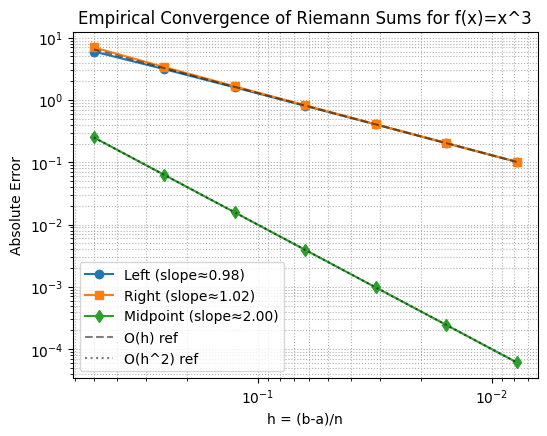

n=   4, h=0.50000, err_left=6.000e+00, err_right=7.000e+00, err_mid=2.500e-01
n=   8, h=0.25000, err_left=3.125e+00, err_right=3.375e+00, err_mid=6.250e-02
n=  16, h=0.12500, err_left=1.594e+00, err_right=1.656e+00, err_mid=1.562e-02
n=  32, h=0.06250, err_left=8.047e-01, err_right=8.203e-01, err_mid=3.906e-03
n=  64, h=0.03125, err_left=4.043e-01, err_right=4.082e-01, err_mid=9.766e-04
n= 128, h=0.01562, err_left=2.026e-01, err_right=2.036e-01, err_mid=2.441e-04
n= 256, h=0.00781, err_left=1.014e-01, err_right=1.017e-01, err_mid=6.104e-05
Estimated global orders: Left~0.98, Right~1.02, Midpoint~2.00


In [22]:
# Empirical error orders for Left, Right, and Midpoint Riemann sums
import numpy as np
import matplotlib.pyplot as plt

# Reuse f, a, b, exact if already defined
try:
    f
except NameError:
    def f(x):
        return x**3
    a, b = 1.0, 3.0
    exact = (b**4 - a**4)/4

if 'a' not in globals():
    a, b = 1.0, 3.0
    exact = (b**4 - a**4)/4

# Functions for left, right, midpoint sums
def left_sum(f, a, b, n):
    x = np.linspace(a, b, n+1)
    h = (b-a)/n
    return h * np.sum(f(x[:-1]))

def right_sum(f, a, b, n):
    x = np.linspace(a, b, n+1)
    h = (b-a)/n
    return h * np.sum(f(x[1:]))

def midpoint_sum(f, a, b, n):
    x = np.linspace(a, b, n+1)
    h = (b-a)/n
    midpoints = (x[:-1] + x[1:]) / 2
    return h * np.sum(f(midpoints))

ns = np.array([4, 8, 16, 32, 64, 128, 256])
hs = (b - a) / ns
err_left = []
err_right = []
err_mid = []
for n in ns:
    err_left.append(abs(exact - left_sum(f, a, b, int(n))))
    err_right.append(abs(exact - right_sum(f, a, b, int(n))))
    err_mid.append(abs(exact - midpoint_sum(f, a, b, int(n))))
err_left = np.array(err_left)
err_right = np.array(err_right)
err_mid = np.array(err_mid)

# Fit slopes in log-log space (ignore first point if desired; here we use all)
sl_left = np.polyfit(np.log(hs), np.log(err_left), 1)[0]
sl_right = np.polyfit(np.log(hs), np.log(err_right), 1)[0]
sl_mid = np.polyfit(np.log(hs), np.log(err_mid), 1)[0]

plt.figure(figsize=(6,4.5))
plt.loglog(hs, err_left, 'o-', label=f'Left (slope≈{sl_left:.2f})')
plt.loglog(hs, err_right, 's-', label=f'Right (slope≈{sl_right:.2f})')
plt.loglog(hs, err_mid, 'd-', label=f'Midpoint (slope≈{sl_mid:.2f})')
# Reference lines: choose constants so lines pass through last midpoint error
C1 = err_left[-1] / hs[-1]  # for O(h)
C2 = err_mid[-1] / (hs[-1]**2)  # for O(h^2)
plt.loglog(hs, C1*hs, 'k--', alpha=0.5, label='O(h) ref')
plt.loglog(hs, C2*hs**2, 'k:', alpha=0.5, label='O(h^2) ref')
plt.gca().invert_xaxis()
plt.xlabel('h = (b-a)/n')
plt.ylabel('Absolute Error')
plt.title('Empirical Convergence of Riemann Sums for f(x)=x^3')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()

for n,h,eL,eR,eM in zip(ns,hs,err_left,err_right,err_mid):
    print(f'n={n:4d}, h={h:.5f}, err_left={eL:.3e}, err_right={eR:.3e}, err_mid={eM:.3e}')
print(f'Estimated global orders: Left~{abs(sl_left):.2f}, Right~{abs(sl_right):.2f}, Midpoint~{abs(sl_mid):.2f}')
